This dataset gives the data of Income and money spent by the customers visiting a shopping mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of customers.

a) Apply Data pre-processing

b) Perform data-preparation (Train-Test Split)


c) Apply Machine Learning Algorithm

d) Evaluate Model.

e) Apply Cross-Validation and Evaluate Mode

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [108]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [109]:
# Encode Gender column
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

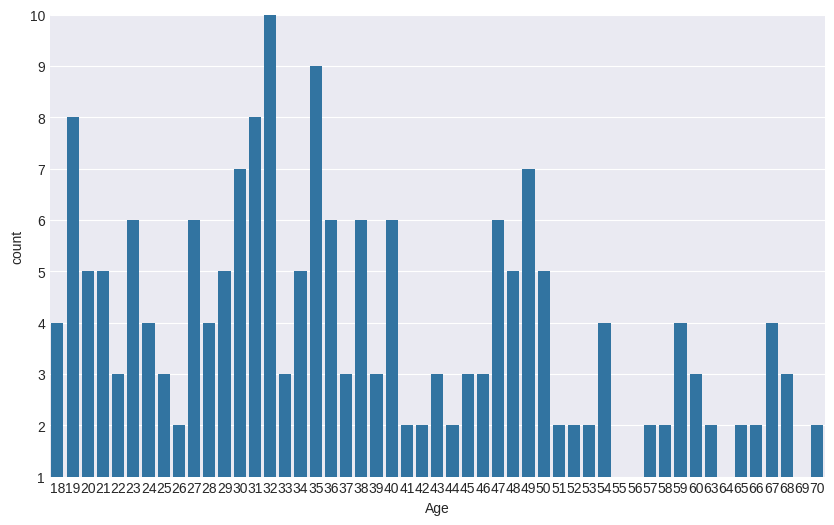

In [110]:
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=data)
# Set y-axis limits between 1 and 10
plt.ylim(1, 10)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

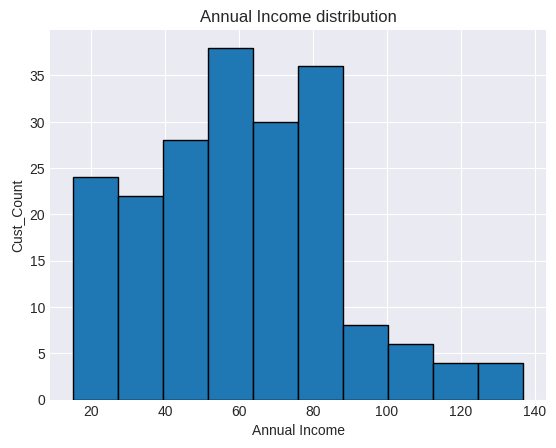

In [112]:
plt.plot(figsize=(10,10))
plt.hist(data["Annual Income (k$)"], edgecolor='k')
plt.title("Annual Income distribution")
plt.xlabel("Annual Income")
plt.ylabel("Cust_Count")
plt.show

In [114]:
data.corr()  #pairwise coerrelation of columns

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Genre,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


In [115]:
data.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Genre'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

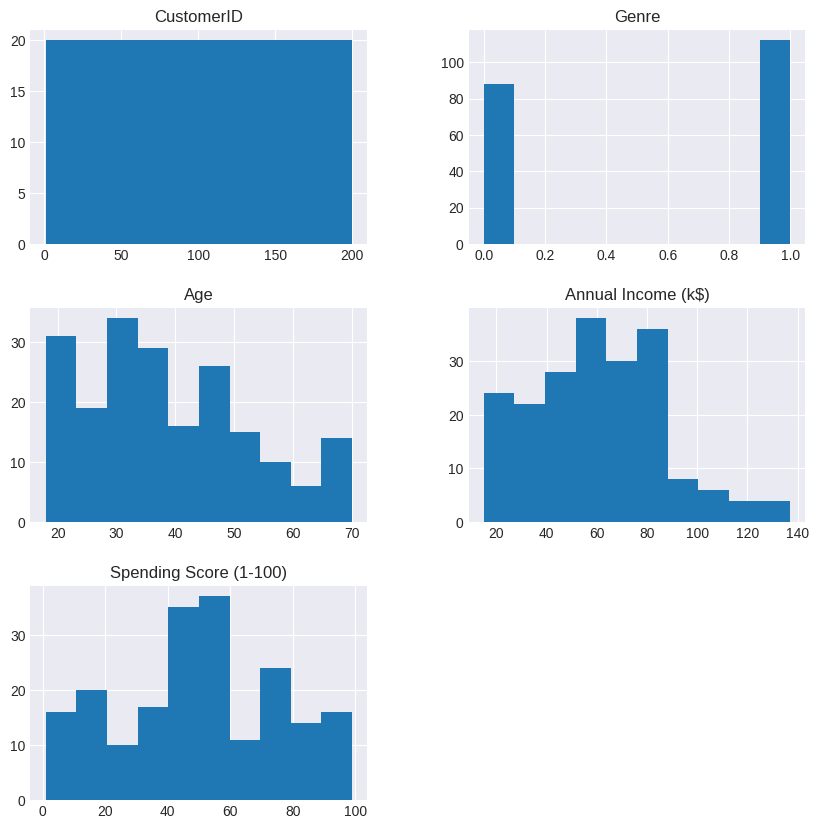

In [116]:
data.hist(figsize=(10,10))

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

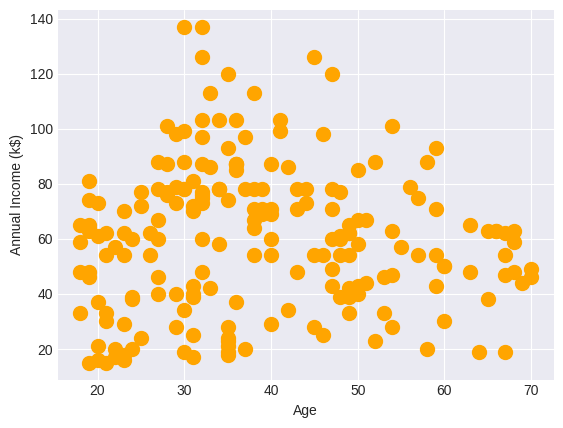

In [117]:
data.plot.scatter(x='Age',y='Annual Income (k$)',s=100 ,color='orange' )

<Axes: >

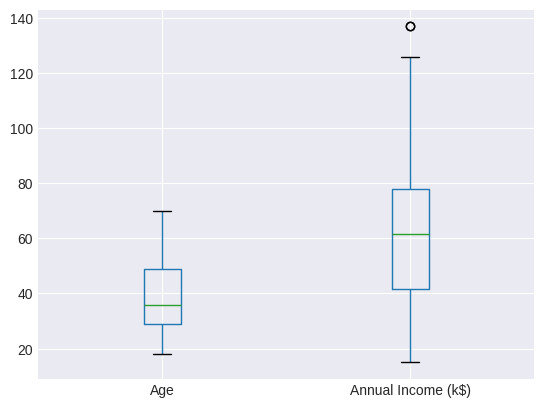

In [118]:
data.boxplot(['Age','Annual Income (k$)'])

<Axes: >

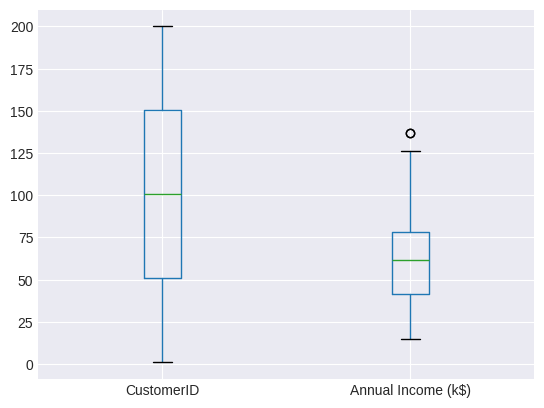

In [119]:
data.boxplot(["CustomerID","Annual Income (k$)"])

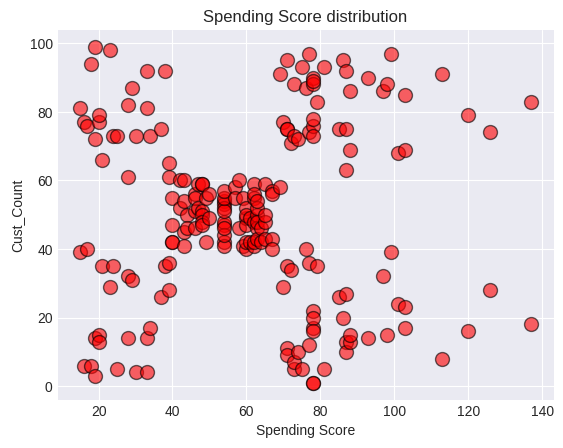

In [120]:
plt.plot(figsize=(10,10))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], color='red', edgecolor='k', alpha=0.6, s=100)
plt.title("Spending Score distribution")
plt.xlabel("Spending Score")
plt.ylabel("Cust_Count")
plt.grid(True)
plt.show()

In [121]:
X = data.iloc[ : , 3:].values
print(X[:10], "\n\n")
print(X[-10:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]] 


[[103  23]
 [103  69]
 [113   8]
 [113  91]
 [120  16]
 [120  79]
 [126  28]
 [126  74]
 [137  18]
 [137  83]]


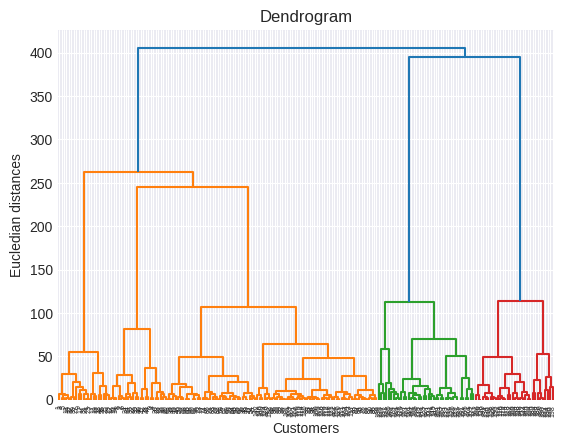

In [122]:
import scipy.cluster.hierarchy as sch

plt.plot(figsize=(20,20))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.show()

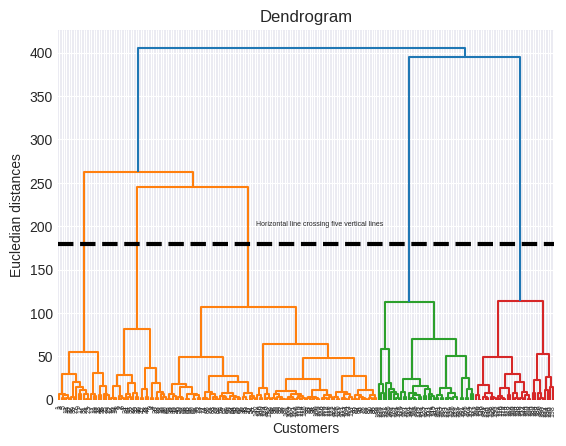

In [123]:
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.hlines(y=180,xmin=0 , xmax=2000, lw=3, linestyles="--", color='black')
plt.text(x=800, y=200, s="Horizontal line crossing five vertical lines", fontsize=5)
plt.show()

In [124]:
from sklearn.cluster import AgglomerativeClustering

# Replace 'affinity' with 'metric'
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [125]:
print("X: ", X[:10])
print("\n \n")
print("y_hc: ", y_hc)

X:  [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]

 

y_hc:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


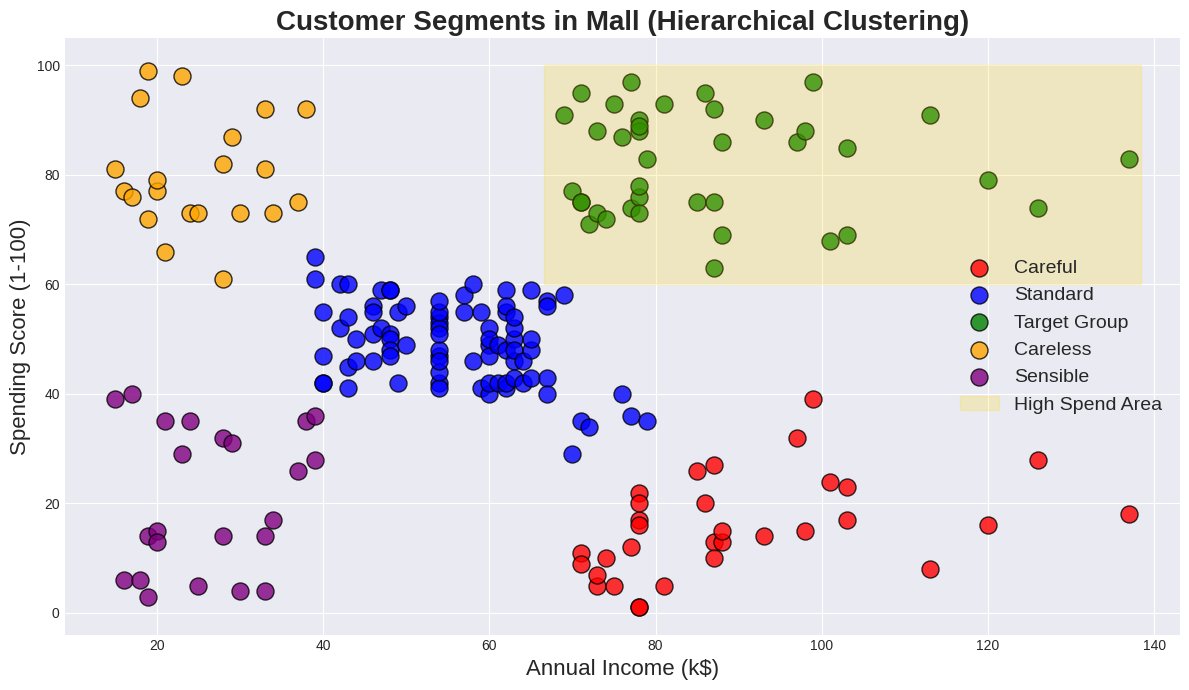

In [126]:
import matplotlib.pyplot as plt

# Use available and clean style
plt.style.use('seaborn-v0_8-darkgrid')  # or try 'ggplot', 'bmh', 'classic'

plt.figure(figsize=(12, 7))

# Plot clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = ['Careful', 'Standard', 'Target Group', 'Careless', 'Sensible']

for i in range(5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1],
                s=150, c=colors[i], label=labels[i],
                edgecolor='black', alpha=0.8)

# Highlight high spending score region
plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965,
            alpha=0.2, color="gold", label='High Spend Area')

# Titles and labels
plt.title("Customer Segments in Mall (Hierarchical Clustering)", fontsize=20, fontweight='bold')
plt.xlabel("Annual Income (k$)", fontsize=16)
plt.ylabel("Spending Score (1-100)", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
